# PACKAGES AND LIBRARIES

#### GENERAL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### PATH

In [2]:
import os
import os.path
from pathlib import Path
import glob

#### IMAGE PROCESS

In [3]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### SCALER & TRANSFORMATION

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

#### ACCURACY CONTROL

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

#### OPTIMIZER

#### MODEL LAYERS

In [6]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D
from keras import models
from keras import layers
import tensorflow as tf

#### IGNORING WARNINGS

In [7]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH

In [8]:
Brain_CT_Path = Path("../input/brain-ct-hemorrhage-dataset/Data")

* file path is determined

In [9]:
JPG_Path = list(Brain_CT_Path.glob(r"**/*.jpg"))

* all images in the file path are assigned to a list

# LABEL

In [10]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

* the categories of the images are separated

# TRANSFORMATION TO SERIES

In [11]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [12]:
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

* it is converted to Series structure before it is converted to DataFrame

# TRANSFORMATION TO DATAFRAME

In [13]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

* it is converted to DataFrame

In [14]:
print(Main_Data.head(-1))

                                                    JPG CATEGORY
0     ../input/brain-ct-hemorrhage-dataset/Data/NORM...   N6[N6]
1     ../input/brain-ct-hemorrhage-dataset/Data/NORM...   N6[N6]
2     ../input/brain-ct-hemorrhage-dataset/Data/NORM...   N6[N6]
3     ../input/brain-ct-hemorrhage-dataset/Data/NORM...   N6[N6]
4     ../input/brain-ct-hemorrhage-dataset/Data/NORM...   N6[N6]
...                                                 ...      ...
6766  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...   12[12]
6767  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...   12[12]
6768  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...   12[12]
6769  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...   12[12]
6770  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...   12[12]

[6771 rows x 2 columns]


#### REPLACING

In [15]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [16]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

* we have to change the names because the categories in the data are complex

In [17]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0     ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
1     ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
2     ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
3     ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
4     ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
...                                                 ...         ...
6766  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
6767  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
6768  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
6769  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
6770  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage

[6771 rows x 2 columns]


In [18]:
print(Main_Data["CATEGORY"].value_counts())

Normal        4105
Hemorrhage    2667
Name: CATEGORY, dtype: int64


# SHUFFLING

In [19]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

* we have to mix the data to increase the success of the model and maintain its objectivity.

In [20]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0     ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
1     ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
2     ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
3     ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
4     ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
...                                                 ...         ...
6766  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
6767  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
6768  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
6769  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
6770  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage

[6771 rows x 2 columns]


# VISUALIZATION

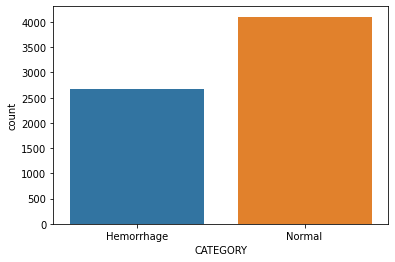

In [21]:
sns.countplot(Main_Data["CATEGORY"])
plt.show()

Text(0.5, 1.0, 'Hemorrhage')

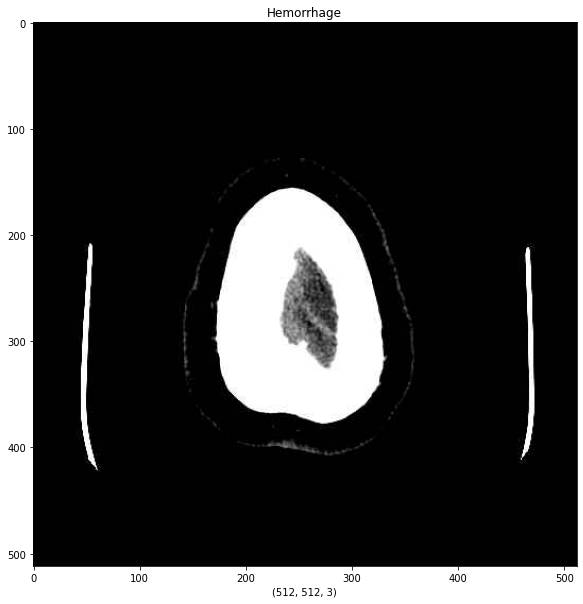

In [22]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][0])

Text(0.5, 1.0, 'Hemorrhage')

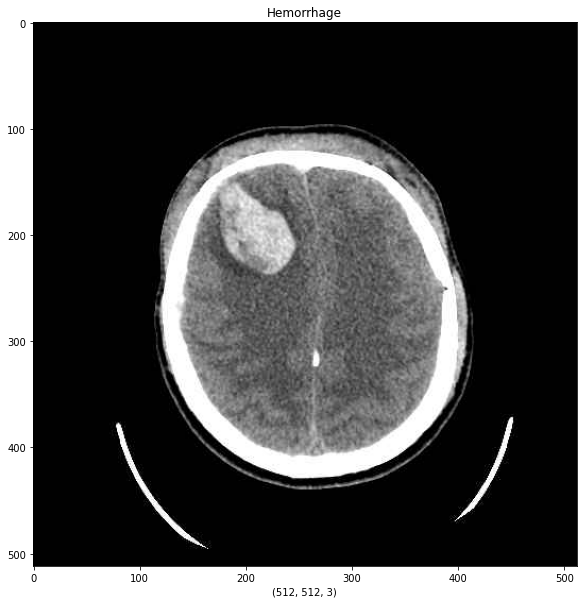

In [23]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][25])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][6769])

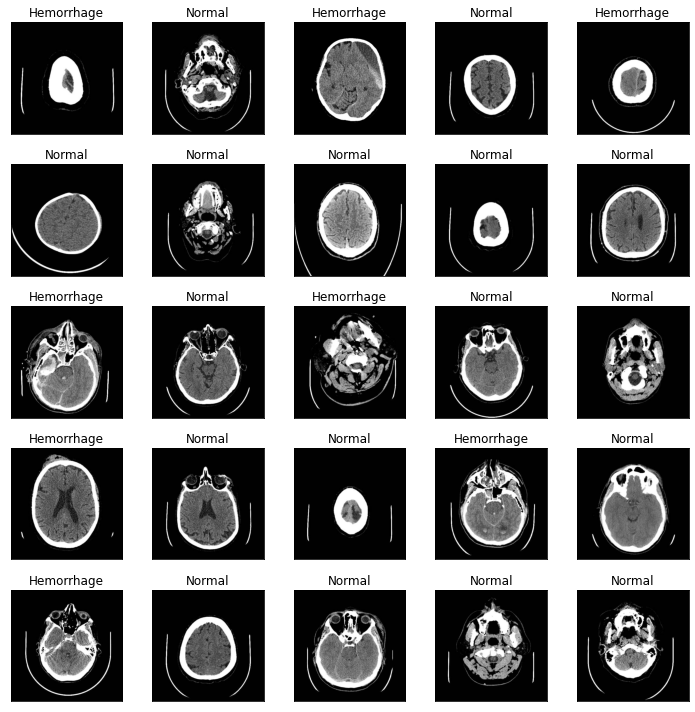

In [24]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# DETERMINATION TRAIN AND TEST DATA

In [25]:
Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.8,shuffle=True,random_state=42)

* we divided it into test and training set
* we set the shuffle parameter to True for training quality
* we told it to use the same data as random state

In [26]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (5417, 2)
TEST SHAPE:  (1355, 2)


In [27]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                    JPG    CATEGORY
5360  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
3519  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
1119  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
810   ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
1129  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
...                                                 ...         ...
3092  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
3772  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
5191  ../input/brain-ct-hemorrhage-dataset/Data/Hemo...  Hemorrhage
5226  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal
5390  ../input/brain-ct-hemorrhage-dataset/Data/NORM...      Normal

[5416 rows x 2 columns]
--------------------------------------------------------------------------------
                                                    JPG    CATEGORY
2689  ../i

# IMAGE GENERATOR

In [28]:
Generator = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True,
                               fill_mode="nearest",
                              validation_split=0.1)

* we used diversification so that the model does not shift to the overfitting orientation

In [29]:
Test_Generator = ImageDataGenerator(rescale=1./255)

* we don't need diversification for test data, we will use it as it is

#### How Generator Applied Image Look Like

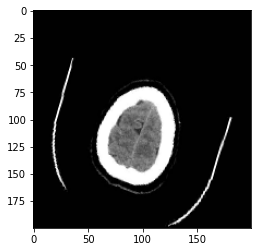

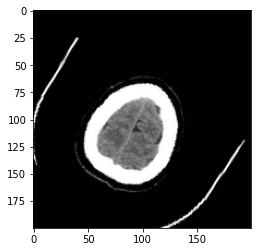

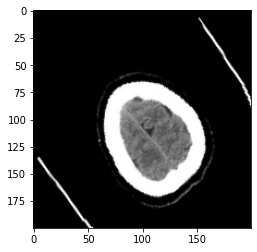

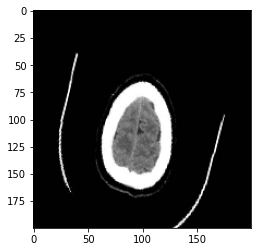

In [30]:
example_Image = Train_Data["JPG"][99]
Load_Image = image.load_img(example_Image,target_size=(200,200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [31]:
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="grayscale",
                                             class_mode="categorical",
                                             subset="training")

Found 4876 validated image filenames belonging to 2 classes.


In [32]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                                  x_col="JPG",
                                                  y_col="CATEGORY",
                                                  color_mode="grayscale",
                                                  class_mode="categorical",
                                                  subset="validation")

Found 541 validated image filenames belonging to 2 classes.


In [33]:
Test_IMG_Set = Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 color_mode="grayscale",
                                                 class_mode="categorical")

Found 1355 validated image filenames belonging to 2 classes.


#### CHECKING

In [34]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [35]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [36]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")

TRAIN: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 1, 1, 0, 1]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 1, 1, 1, 0]
(256, 256, 1)
------------------------------------------------------------
TEST: 


In [37]:
print(Test_IMG_Set.batch_size)
print(Test_IMG_Set.image_shape)

32
(256, 256, 1)


# CNN STRUCTURE WITH LSTM / RCNN

In [38]:
Model = Sequential()

Model.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(256,256,1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(2,activation="softmax"))

* LSTM and GRU are iterative layers

* LSTM and GRU serve to inject past information into the future, thereby reducing the gradient destruction problem

* we used LSTM and GRU layers both with fully-connetted layers and Conv2D
* RCNN structure is created in this way
* we determined the LSTM and GRU layers as bidirectional

* less problem of gradient disappearance in LSTM and GRU

* we used it with Dropout so that the model does not shift to overfitting orientation
* we made return_success True because we wanted each process to generate output separately

* we also used dropout within the GRU and LSTM layers to prevent the model from shifting to the overfitting orientation
* recurrent_dropout means transmission damping ratio of iterative layers

Loss Function We Used:


![](https://gombru.github.io/assets/cross_entropy_loss/intro.png)

* Activation Function:

![](http://rasbt.github.io/mlxtend/user_guide/general_concepts/activation-functions_files/activation-functions.png)

In [39]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Changing file directory and patience set to 5 & saving only best models
filepath = "/kaggle/working/weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"
earlystop = EarlyStopping(monitor='accuracy', mode='max', patience=5)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', save_best_only=True, mode='max')
callbacks_list = [earlystop, checkpoint]

* we wanted the training of the model to stop where the loss value is minimal

In [40]:
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with learning rate 0.001
adam = Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer instance
Model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history = Model.fit(
    Train_IMG_Set,
    steps_per_epoch=len(Train_IMG_Set),
    epochs=50,  # Add a comma here
    validation_data=Validation_IMG_Set,
    validation_steps=len(Validation_IMG_Set),
    callbacks=[checkpoint]  # Include the ModelCheckpoint callback here
)

Epoch 1/50
153/153 [==============================] - 83s 543ms/step - loss: 0.6863 - accuracy: 0.5913 - val_loss: 0.6965 - val_accuracy: 0.4713
Epoch 2/50
153/153 [==============================] - 68s 445ms/step - loss: 0.6562 - accuracy: 0.6177 - val_loss: 0.6613 - val_accuracy: 0.5915
Epoch 3/50
153/153 [==============================] - 68s 445ms/step - loss: 0.6493 - accuracy: 0.6148 - val_loss: 0.6464 - val_accuracy: 0.5989
Epoch 4/50
153/153 [==============================] - 68s 442ms/step - loss: 0.6399 - accuracy: 0.6329 - val_loss: 0.6268 - val_accuracy: 0.6377
Epoch 5/50
153/153 [==============================] - 68s 442ms/step - loss: 0.6384 - accuracy: 0.6378 - val_loss: 0.6301 - val_accuracy: 0.6599
Epoch 6/50
153/153 [==============================] - 68s 441ms/step - loss: 0.6136 - accuracy: 0.6608 - val_loss: 0.6015 - val_accuracy: 0.6895
Epoch 7/50
153/153 [==============================] - 67s 439ms/step - loss: 0.6011 - accuracy: 0.6751 - val_loss: 0.5676 - val_ac

#### CHECKING

In [46]:
Model.save("model.h5")

In [47]:
Model_Results = Model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.1539
ACCURACY:  0.94


In [48]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 12)      120       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 12)      48        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 12)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 24)      2616      
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 24)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        1

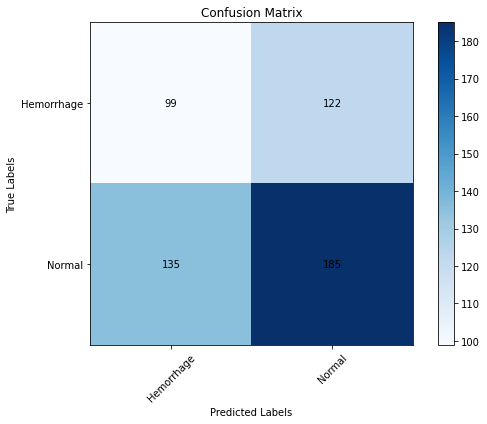

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the validation set
predictions = Model.predict(Validation_IMG_Set)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted classes

# Get the true classes
true_classes = Validation_IMG_Set.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix with transparent background
plt.figure(figsize=(8, 6), facecolor='none')  # Set transparent background
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')

# Add values to the cells
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.title('Confusion Matrix', color='black')  # Set label color to black
plt.xlabel('Predicted Labels', color='black')  # Set label color to black
plt.ylabel('True Labels', color='black')  # Set label color to black
plt.xticks(np.arange(len(Validation_IMG_Set.class_indices)), Validation_IMG_Set.class_indices.keys(), color='black', rotation=45)
plt.yticks(np.arange(len(Validation_IMG_Set.class_indices)), Validation_IMG_Set.class_indices.keys(), color='black')
plt.tight_layout()

# Save the confusion matrix plot with transparent background and size 640x640
plt.savefig('confusion_matrix.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.0)


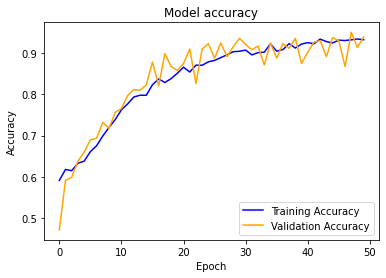

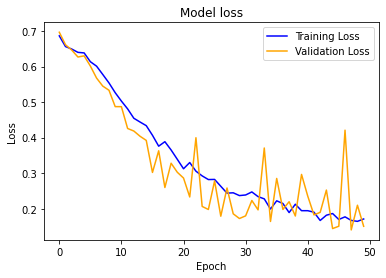

In [51]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.savefig('accuracy_plot.png')  # Save the plot as an image
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], color='blue', label='Training Loss')
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig('loss_plot.png')  # Save the plot as an image
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
import pandas as pd

# Make predictions on the validation set
predictions = Model.predict(Validation_IMG_Set)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted classes

# Get the true classes
true_classes = Validation_IMG_Set.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Create a DataFrame for the F1 score
f1_df = pd.DataFrame({'Class': Validation_IMG_Set.class_indices.keys(),
                       'F1 Score': f1_score(true_classes, predicted_classes, average=None)})

print("F1 Score:")
print(f1_df)


F1 Score:
        Class  F1 Score
0  Hemorrhage  0.455142
1      Normal  0.601600


In [68]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import numpy as np
import pandas as pd

# Make predictions on the validation set
predictions = Model.predict(Validation_IMG_Set)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted classes

# Get the true classes
true_classes = Validation_IMG_Set.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate F1 score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=Validation_IMG_Set.class_indices.keys(), output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("F1 Score:")
print(f1)
print("\nClassification Report:")
print(report_df)


F1 Score:
0.49564185321127346

Classification Report:
              precision    recall  f1-score    support
Hemorrhage     0.387234  0.411765  0.399123  221.00000
Normal         0.575163  0.550000  0.562300  320.00000
accuracy       0.493530  0.493530  0.493530    0.49353
macro avg      0.481199  0.480882  0.480712  541.00000
weighted avg   0.498394  0.493530  0.495642  541.00000


ROC AUC: 0.5882565045248869


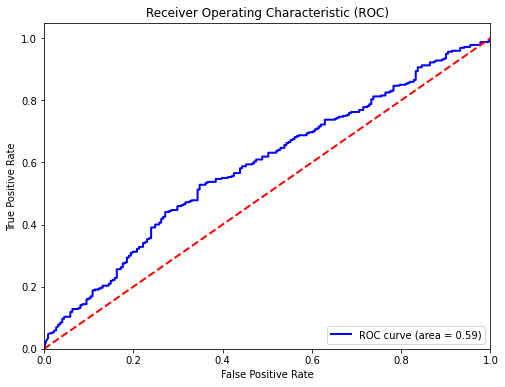

In [66]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(true_classes, predictions[:, 1])
roc_auc = auc(fpr, tpr)

print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### PREDICTION

In [53]:
Prediction = Model.predict(Test_IMG_Set)
Prediction = Prediction.argmax(axis=-1)

In [ ]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Prediction[i]}")
plt.tight_layout()
plt.show()